Section 1
\          /
---> O ---> -->
/          \

Each neuron/node is a function with simple (but potentially nonlinear) behavior.
Eg is F(x) { 0 : x<=0 ; x : x>0 } thresholding fxn
Neural networks can track complicated functions with modular components

In [1]:
from __future__ import print_function
import torch; print(torch.__version__)

1.1.0


In [2]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim #set of optimizers
import torch.utils.data as utils #inputs/outputs
import matplotlib.pyplot as plt

In [44]:
class Net(nn.Module):

    def __init__(self, breadth=500, depth=2):
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        # 2 hidden layers?
        self.breadth = breadth
        self.depth = depth
        
#         self.fc1 = nn.Linear(1, self.breadth)
#         self.fc2 = nn.Linear(500, 500)
#         self.fc3 = nn.Linear(500, 1)
        self.fc = []
        self.fc1 = nn.Linear(1, self.breadth)
        for i in range(self.depth-1):
            dep = i+2
            setattr(self, "fc%d" % dep, nn.Linear(self.breadth, self.breadth))
        setattr(self, 'fc%d' % self.depth, nn.Linear(self.breadth, 1))

#         self.fc3 = nn.Linear(self.breadth, 1) # 500 nodes to 1 node
#     def forward(self, x):
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x
    def forward(self, x):
        # This "runs" the neural network
        for i in range(self.depth):
            dep = i+1
            fc = getattr(self, 'fc%d' % dep)
            x = F.relu(fc(x))
        return x
    
net = Net(breadth=300, depth=3)
print(net)

foo
foo
Net(
  (fc1): Linear(in_features=1, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=1, bias=True)
)


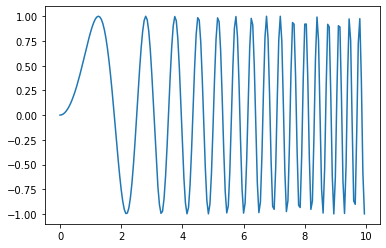

In [5]:
inputs = Variable(torch.arange(0,10,0.05))
#true_vals = torch.mul(inputs, inputs)
true_vals = torch.sin(inputs*inputs)
plt.plot(list(inputs.data), list(true_vals.data))
plt.show()

In [6]:
net.zero_grad() 
# Do before new gradients to avoid depending on old data

outputs = net(Variable(torch.Tensor([0])))
outputs.backward(torch.randn(1)) # use random gradients to break symmetry

learning_rate = 1
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [7]:
from tqdm import trange # Used to provide progress bar

# create your optimizer
optimizer = optim.Adam(net.parameters())
criterion = nn.MSELoss()

num_epochs = 100
t = trange(num_epochs)
for epoch in t:  # loop over the dataset multiple times

    running_loss = 0.0

    # wrap them in Variable
    reshaped_inputs = inputs.view(-1, 1) # Structure with each input in its own row
    reshaped_outputs = true_vals.view(-1, 1) # Neglecting to have outputs and true vals to match dimension is a common mistake.

    # forward + backward + optimize
    outputs = net(reshaped_inputs)
    #print(outputs)
    #print(reshaped_outputs)
    #loss = criterion(outputs, reshaped_outputs)
    error = reshaped_outputs - outputs
    #print("ERROR")
    #print(error)
    loss = (error ** 2).mean()
    
    loss.backward()
    optimizer.step()
    
    # zero the parameter gradients
    optimizer.zero_grad()
    
    t.set_description('ML (loss=%g)' % loss.item()) # Updates Loss information
    #t.set_description('ML Loss: ' + str(loss.item())) # Updates Loss information

print('Finished Training')

ML (loss=0.359595): 100%|██████████| 10000/10000 [02:54<00:00, 57.21it/s]

Finished Training


In [45]:
t = trange(10)
loss = []
breadth = []
for i in t:
    breadth_num = 100*i + 50
    breadth.append(breadth_num)
    net = Net(breadth=breadth_num)
    num_epochs = 100
    a = torch.arange(num_epochs)
    for epoch in a:  # loop over the dataset multiple times

        running_loss = 0.0

        # wrap them in Variable
        reshaped_inputs = inputs.view(-1, 1) # Structure with each input in its own row
        reshaped_outputs = true_vals.view(-1, 1) # Neglecting to have outputs and true vals to match dimension is a common mistake.

        # forward + backward + optimize
        outputs = net(reshaped_inputs)
        #print(outputs)
        #print(reshaped_outputs)
        #loss = criterion(outputs, reshaped_outputs)
        error = reshaped_outputs - outputs
        #print("ERROR")
        #print(error)
        loss_current = (error ** 2).mean()
    
        loss_current.backward()
        optimizer.step()
    
        # zero the parameter gradients
        optimizer.zero_grad()
            
    loss.append(loss_current)
    t.set_description('ML (loss=%g)' % loss_current) # Updates Loss information
        #t.set_description('ML Loss: ' + str(loss.item())) # Updates Loss information

    











  0%|          | 0/10 [00:00<?, ?it/s]

foo












ML (loss=0.477905):   0%|          | 0/10 [00:01<?, ?it/s]









ML (loss=0.477905):  10%|█         | 1/10 [00:01<00:13,  1.45s/it]

foo












ML (loss=7.86034):  10%|█         | 1/10 [00:02<00:13,  1.45s/it] 









ML (loss=7.86034):  20%|██        | 2/10 [00:02<00:11,  1.47s/it]

foo












ML (loss=0.506425):  20%|██        | 2/10 [00:04<00:11,  1.47s/it]









ML (loss=0.506425):  30%|███       | 3/10 [00:04<00:10,  1.54s/it]

foo












ML (loss=0.478053):  30%|███       | 3/10 [00:06<00:10,  1.54s/it]









ML (loss=0.478053):  40%|████      | 4/10 [00:06<00:09,  1.55s/it]

foo












ML (loss=2.30682):  40%|████      | 4/10 [00:07<00:09,  1.55s/it] 









ML (loss=2.30682):  50%|█████     | 5/10 [00:07<00:07,  1.54s/it]

foo












ML (loss=0.479123):  50%|█████     | 5/10 [00:09<00:07,  1.54s/it]









ML (loss=0.479123):  60%|██████    | 6/10 [00:09<00:06,  1.55s/it]

foo












ML (loss=0.477914):  60%|██████    | 6/10 [00:10<00:06,  1.55s/it]









ML (loss=0.477914):  70%|███████   | 7/10 [00:10<00:04,  1.55s/it]

foo












ML (loss=0.924007):  70%|███████   | 7/10 [00:12<00:04,  1.55s/it]









ML (loss=0.924007):  80%|████████  | 8/10 [00:12<00:03,  1.56s/it]

foo












ML (loss=0.477905):  80%|████████  | 8/10 [00:14<00:03,  1.56s/it]









ML (loss=0.477905):  90%|█████████ | 9/10 [00:14<00:01,  1.56s/it]

foo












ML (loss=0.477905):  90%|█████████ | 9/10 [00:15<00:01,  1.56s/it]









ML (loss=0.477905): 100%|██████████| 10/10 [00:15<00:00,  1.58s/it]


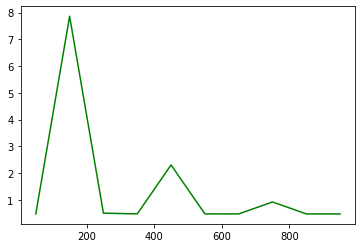

In [46]:
predicted =net.forward(reshaped_inputs).data.numpy()

#plt.plot(list(inputs.data), list(true_vals.data), 'g')
#plt.plot(list(inputs.data), predicted, 'b')
plt.plot(list(breadth), list(loss), 'g')
plt.show()

In [47]:
t = trange(10)
loss = []
depth = []
for i in t:
    depth_num = i+2
    depth.append(depth_num)
    net = Net(depth=depth_num)
    num_epochs = 100
    a = torch.arange(num_epochs)
    for epoch in a:  # loop over the dataset multiple times

        running_loss = 0.0

        # wrap them in Variable
        reshaped_inputs = inputs.view(-1, 1) # Structure with each input in its own row
        reshaped_outputs = true_vals.view(-1, 1) # Neglecting to have outputs and true vals to match dimension is a common mistake.

        # forward + backward + optimize
        outputs = net(reshaped_inputs)
        #print(outputs)
        #print(reshaped_outputs)
        #loss = criterion(outputs, reshaped_outputs)
        error = reshaped_outputs - outputs
        #print("ERROR")
        #print(error)
        loss_current = (error ** 2).mean()
    
        loss_current.backward()
        optimizer.step()
    
        # zero the parameter gradients
        optimizer.zero_grad()
            
    loss.append(loss_current)
    t.set_description('ML (loss=%g)' % loss_current) # Updates Loss information
        #t.set_description('ML Loss: ' + str(loss.item())) # Updates Loss information











  0%|          | 0/10 [00:00<?, ?it/s]

foo












ML (loss=1.32466):   0%|          | 0/10 [00:01<?, ?it/s]









ML (loss=1.32466):  10%|█         | 1/10 [00:01<00:14,  1.65s/it]

foo
foo












ML (loss=0.611932):  10%|█         | 1/10 [00:03<00:14,  1.65s/it]









ML (loss=0.611932):  20%|██        | 2/10 [00:03<00:14,  1.78s/it]

foo
foo
foo












ML (loss=0.524784):  20%|██        | 2/10 [00:07<00:14,  1.78s/it]









ML (loss=0.524784):  30%|███       | 3/10 [00:07<00:15,  2.24s/it]

foo
foo
foo
foo












ML (loss=0.475277):  30%|███       | 3/10 [00:10<00:15,  2.24s/it]









ML (loss=0.475277):  40%|████      | 4/10 [00:10<00:15,  2.53s/it]

foo
foo
foo
foo
foo












ML (loss=0.479796):  40%|████      | 4/10 [00:14<00:15,  2.53s/it]









ML (loss=0.479796):  50%|█████     | 5/10 [00:14<00:14,  2.90s/it]

foo
foo
foo
foo
foo
foo












ML (loss=0.477905):  50%|█████     | 5/10 [00:18<00:14,  2.90s/it]









ML (loss=0.477905):  60%|██████    | 6/10 [00:18<00:13,  3.34s/it]

foo
foo
foo
foo
foo
foo
foo












ML (loss=0.474138):  60%|██████    | 6/10 [00:24<00:13,  3.34s/it]









ML (loss=0.474138):  70%|███████   | 7/10 [00:24<00:12,  4.14s/it]

foo
foo
foo
foo
foo
foo
foo
foo












ML (loss=0.477905):  70%|███████   | 7/10 [00:29<00:12,  4.14s/it]









ML (loss=0.477905):  80%|████████  | 8/10 [00:29<00:09,  4.53s/it]

foo
foo
foo
foo
foo
foo
foo
foo
foo












ML (loss=0.474647):  80%|████████  | 8/10 [00:36<00:09,  4.53s/it]









ML (loss=0.474647):  90%|█████████ | 9/10 [00:36<00:05,  5.03s/it]

foo
foo
foo
foo
foo
foo
foo
foo
foo
foo












ML (loss=0.477905):  90%|█████████ | 9/10 [00:42<00:05,  5.03s/it]









ML (loss=0.477905): 100%|██████████| 10/10 [00:42<00:00,  4.29s/it]


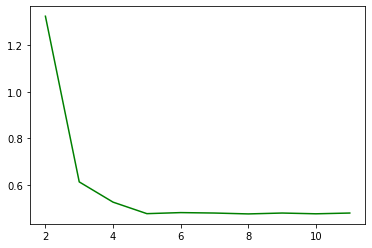

In [49]:
predicted =net.forward(reshaped_inputs).data.numpy()

#plt.plot(list(inputs.data), list(true_vals.data), 'g')
#plt.plot(list(inputs.data), predicted, 'b')
plt.plot(list(depth), list(loss), 'g')
plt.show()












100%|██████████| 20/20 [00:00<00:00, 6916.73it/s]A


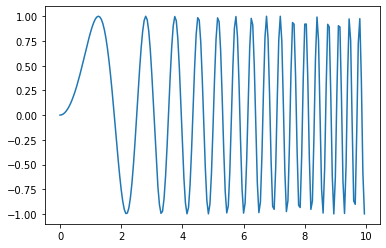

In [54]:
t = trange(20)
for i in t:
    num_pts = 10*(i+1)
    inputs = Variable(torch.arange(0,10,1.0/(i+1)))
    # inputs = Variable(torch.arange(0,10,0.05))
    #true_vals = torch.mul(inputs, inputs)
    true_vals = torch.sin(inputs*inputs)
plt.plot(list(inputs.data), list(true_vals.data))
plt.show()